In [47]:
#Importing all the required libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('option_train.csv')

In [3]:
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [4]:
data.shape

(1680, 6)

In [5]:
data.describe()

,Value,S,K,tau,r
count,1678.000000,1679.000000,1678.000000,1679.000000,1680.000000
mean,15.068709,464.402535,438.241955,0.437519,0.030235
std,14.040023,973.652179,23.408989,7.057555,0.000557
min,0.125000,0.000000,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.634081,440.000000,0.202381,0.030130
75%,25.747434,447.320414,455.000000,0.285714,0.030540
max,60.149367,40333.000000,500.000000,250.000000,0.031880


In [6]:
data = data[data['S'].notna()]
data = data[data['Value'].notna()]

In [7]:
df1 = data.copy()

In [8]:
# data.rename(columns = {0:'Value',1:'S',2:'K',3:'tau', 4:'r', 5:'BS'})

In [9]:
# Convert the target variable to binary form
data['BS'] = data['BS'].replace({'Under': 0, 'Over': 1})



/var/folders/lf/26fkvy457ylgn2_6y7lbk6940000gn/T/ipykernel_46479/2233083377.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['BS'] = data['BS'].replace({'Under': 0, 'Over': 1})


In [10]:
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [467]:
# # data.set_value(data.loc[df1['S'] == 40333].index[0], 'S', None)
# data.at[data.loc[data['S'] == 40333].index[0], 'S'] = None
# data.loc[df1['S'] == 40333]['S']

In [11]:
data1 = data
data1.at[data1.loc[data1['S'] == 40333].index[0], 'S'] = None
data1.at[data1.loc[data1['S'] == 0].index[0], 'S'] = None
data1.at[data1.loc[data1['tau'] == 250].index[0], 'tau'] = None
data1.at[data1.loc[data1['tau'] == 146].index[0], 'tau'] = None

# data.loc[df1['S'] == 0] = None

# data.loc[df1['tau'] == 250] = None
# 
# data.loc[df1['tau'] == 146] = None

imputer = KNNImputer(n_neighbors = 25, weights = 'distance', metric = 'nan_euclidean')
data1 = pd.DataFrame(imputer.fit_transform(data1.iloc[:, 1:5]))
data1.describe()

,0,1,2,3
count,1677.000000,1677.000000,1677.000000,1677.000000
mean,440.915401,438.246869,0.201899,0.030236
std,7.526592,23.415106,0.099776,0.000557
min,425.472331,375.000000,0.003968,0.029510
25%,433.886762,420.000000,0.119048,0.029820
50%,442.634081,440.000000,0.202381,0.030130
75%,447.320414,455.000000,0.285714,0.030540
max,455.880619,500.000000,0.392857,0.031880


In [12]:
data.isna().sum()

Value    0
S        2
K        0
tau      2
r        0
BS       0
dtype: int64

In [13]:
# data = df2
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [14]:
data1.head()

,0,1,2,3
0,431.623898,420.0,0.341270,0.03013
1,427.015526,465.0,0.166667,0.03126
2,427.762336,415.0,0.265873,0.03116
3,451.711658,460.0,0.063492,0.02972
4,446.718974,410.0,0.166667,0.02962


In [15]:
data1.rename(columns = {0:'S',1:'K',2:'tau', 3:'r'}, inplace = True)

In [16]:
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [17]:
data1.head()

,S,K,tau,r
0,431.623898,420.0,0.341270,0.03013
1,427.015526,465.0,0.166667,0.03126
2,427.762336,415.0,0.265873,0.03116
3,451.711658,460.0,0.063492,0.02972
4,446.718974,410.0,0.166667,0.02962


In [475]:
# #remove the 40333 value row in S
# data = data.drop(data.loc[data['S'] == 40333].index)
# data = data.drop(data.loc[data['S'] == 0].index)
# data = data.drop(data.loc[data['tau'] == 250].index)
# data = data.drop(data.loc[data['tau'] == 146].index)
# data = data.dropna()
# data.describe()


In [18]:
data.shape, data1.shape

((1677, 6), (1677, 4))

In [19]:
data.describe()

,Value,S,K,tau,r,BS
count,1677.000000,1675.000000,1677.000000,1675.000000,1677.000000,1677.000000
mean,15.072551,440.907972,438.246869,0.201910,0.030236,0.436494
std,14.043328,7.527664,23.415106,0.099832,0.000557,0.496098
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000
25%,2.255001,433.875313,420.000000,0.119048,0.029820,0.000000
50%,11.220588,442.634081,440.000000,0.202381,0.030130,0.000000
75%,25.748964,447.320414,455.000000,0.285714,0.030540,1.000000
max,60.149367,455.880619,500.000000,0.392857,0.031880,1.000000


<font size = '5'> 1. <u>KNN Regression</u> </font>

In [20]:
# Split the dataset
X = data1.loc[:, ['S', 'K', 'tau', 'r']]
y = data.loc[:, ['Value']]

In [21]:
y

,Value
0,21.670404
1,0.125000
2,20.691244
3,1.035002
4,39.553020
...,...
1675,1.470000
1676,34.927317
1677,41.127997
1678,0.440003


In [22]:
X.columns

Index(['S', 'K', 'tau', 'r'], dtype='object')

In [23]:
y.columns

Index(['Value'], dtype='object')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Choose a value for K
k = 5

In [27]:
# Train the model
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 5.550157748728962
R^2 Score: 0.9710005037904756


<font size = '5'> 1. <u>KNN Classification</u> </font>

In [30]:
# Convert the target variable to binary form
data['BS'] = data['BS'].replace({'Under': 0, 'Over': 1})

# Print the updated dataset
print(data.head())

       Value           S      K       tau        r  BS
0  21.670404  431.623898  420.0  0.341270  0.03013   0
1   0.125000  427.015526  465.0  0.166667  0.03126   1
2  20.691244  427.762336  415.0  0.265873  0.03116   0
3   1.035002  451.711658  460.0  0.063492  0.02972   1
4  39.553020  446.718974  410.0  0.166667  0.02962   0


In [573]:
# data['BS']

In [31]:
data['BS'] = data['BS'].astype(int)
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [32]:
# Split the dataset
X1 = data1.loc[:, ['S', 'K', 'tau', 'r']]
y1 = data.loc[:, ['BS']]

In [33]:
X1.columns

Index(['S', 'K', 'tau', 'r'], dtype='object')

In [34]:
y1.columns

Index(['BS'], dtype='object')

In [35]:
# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [36]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [37]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
# Fit the KNN classifier on the training set
knn.fit(X1_train_scaled, y1_train)

/Users/adityadhanotia/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [39]:
# Predict the target variable on the test set
y1_pred = knn.predict(X1_test_scaled)

In [40]:
# Calculate the accuracy score
accuracy = accuracy_score(y1_test, y1_pred)

In [41]:
# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.9305555555555556


Area Under Curve (AUC) is 0.9791387131812663


<Figure size 640x480 with 0 Axes>

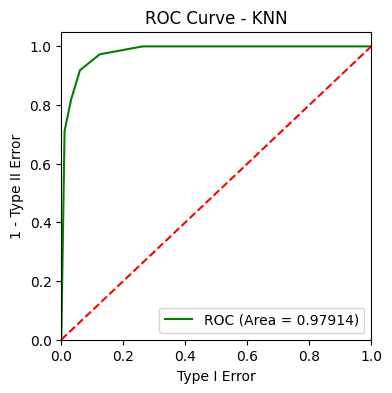

In [48]:
#Getting the probabilities
y_proba = knn.predict_proba(X1_test_scaled)

# Getting the probabilities
y_prob = y_proba[:, 1]

# Calculating the false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(y1_test, y_prob)

# Calculating the AUC score
auc = roc_auc_score(y1_test, y_prob)


# Plotting the ROC curve
plt.figure()
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label = 'ROC (Area = {0:.5f})'.format(auc), color = 'green')
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc = "lower right")
plt.xlabel('Type I Error')
plt.ylabel('1 - Type II Error')
plt.title('ROC Curve - KNN')


print('Area Under Curve (AUC) is', auc)